In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
import random

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score

In [4]:
from sklearn.metrics import confusion_matrix,classification_report

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [6]:
path_to_directory="D:/project/phishing/Data"
files = [arff for arff in os.listdir(path_to_directory) if arff.endswith(".arff")]

def toCsv(content): 
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent


for z,file in enumerate(files):
    with open(path_to_directory+'/'+file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

In [7]:
train=pd.read_csv("D:/project/phishing/Data/Training Dataset.csv")

In [8]:
print("tarin dataset have  %d rows and %d columns "%(train.shape[0],train.shape[1]))


tarin dataset have  11055 rows and 31 columns 


In [9]:
train.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

#### data

In [10]:
train.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [11]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [13]:
train.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [14]:
train.corr()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,...,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


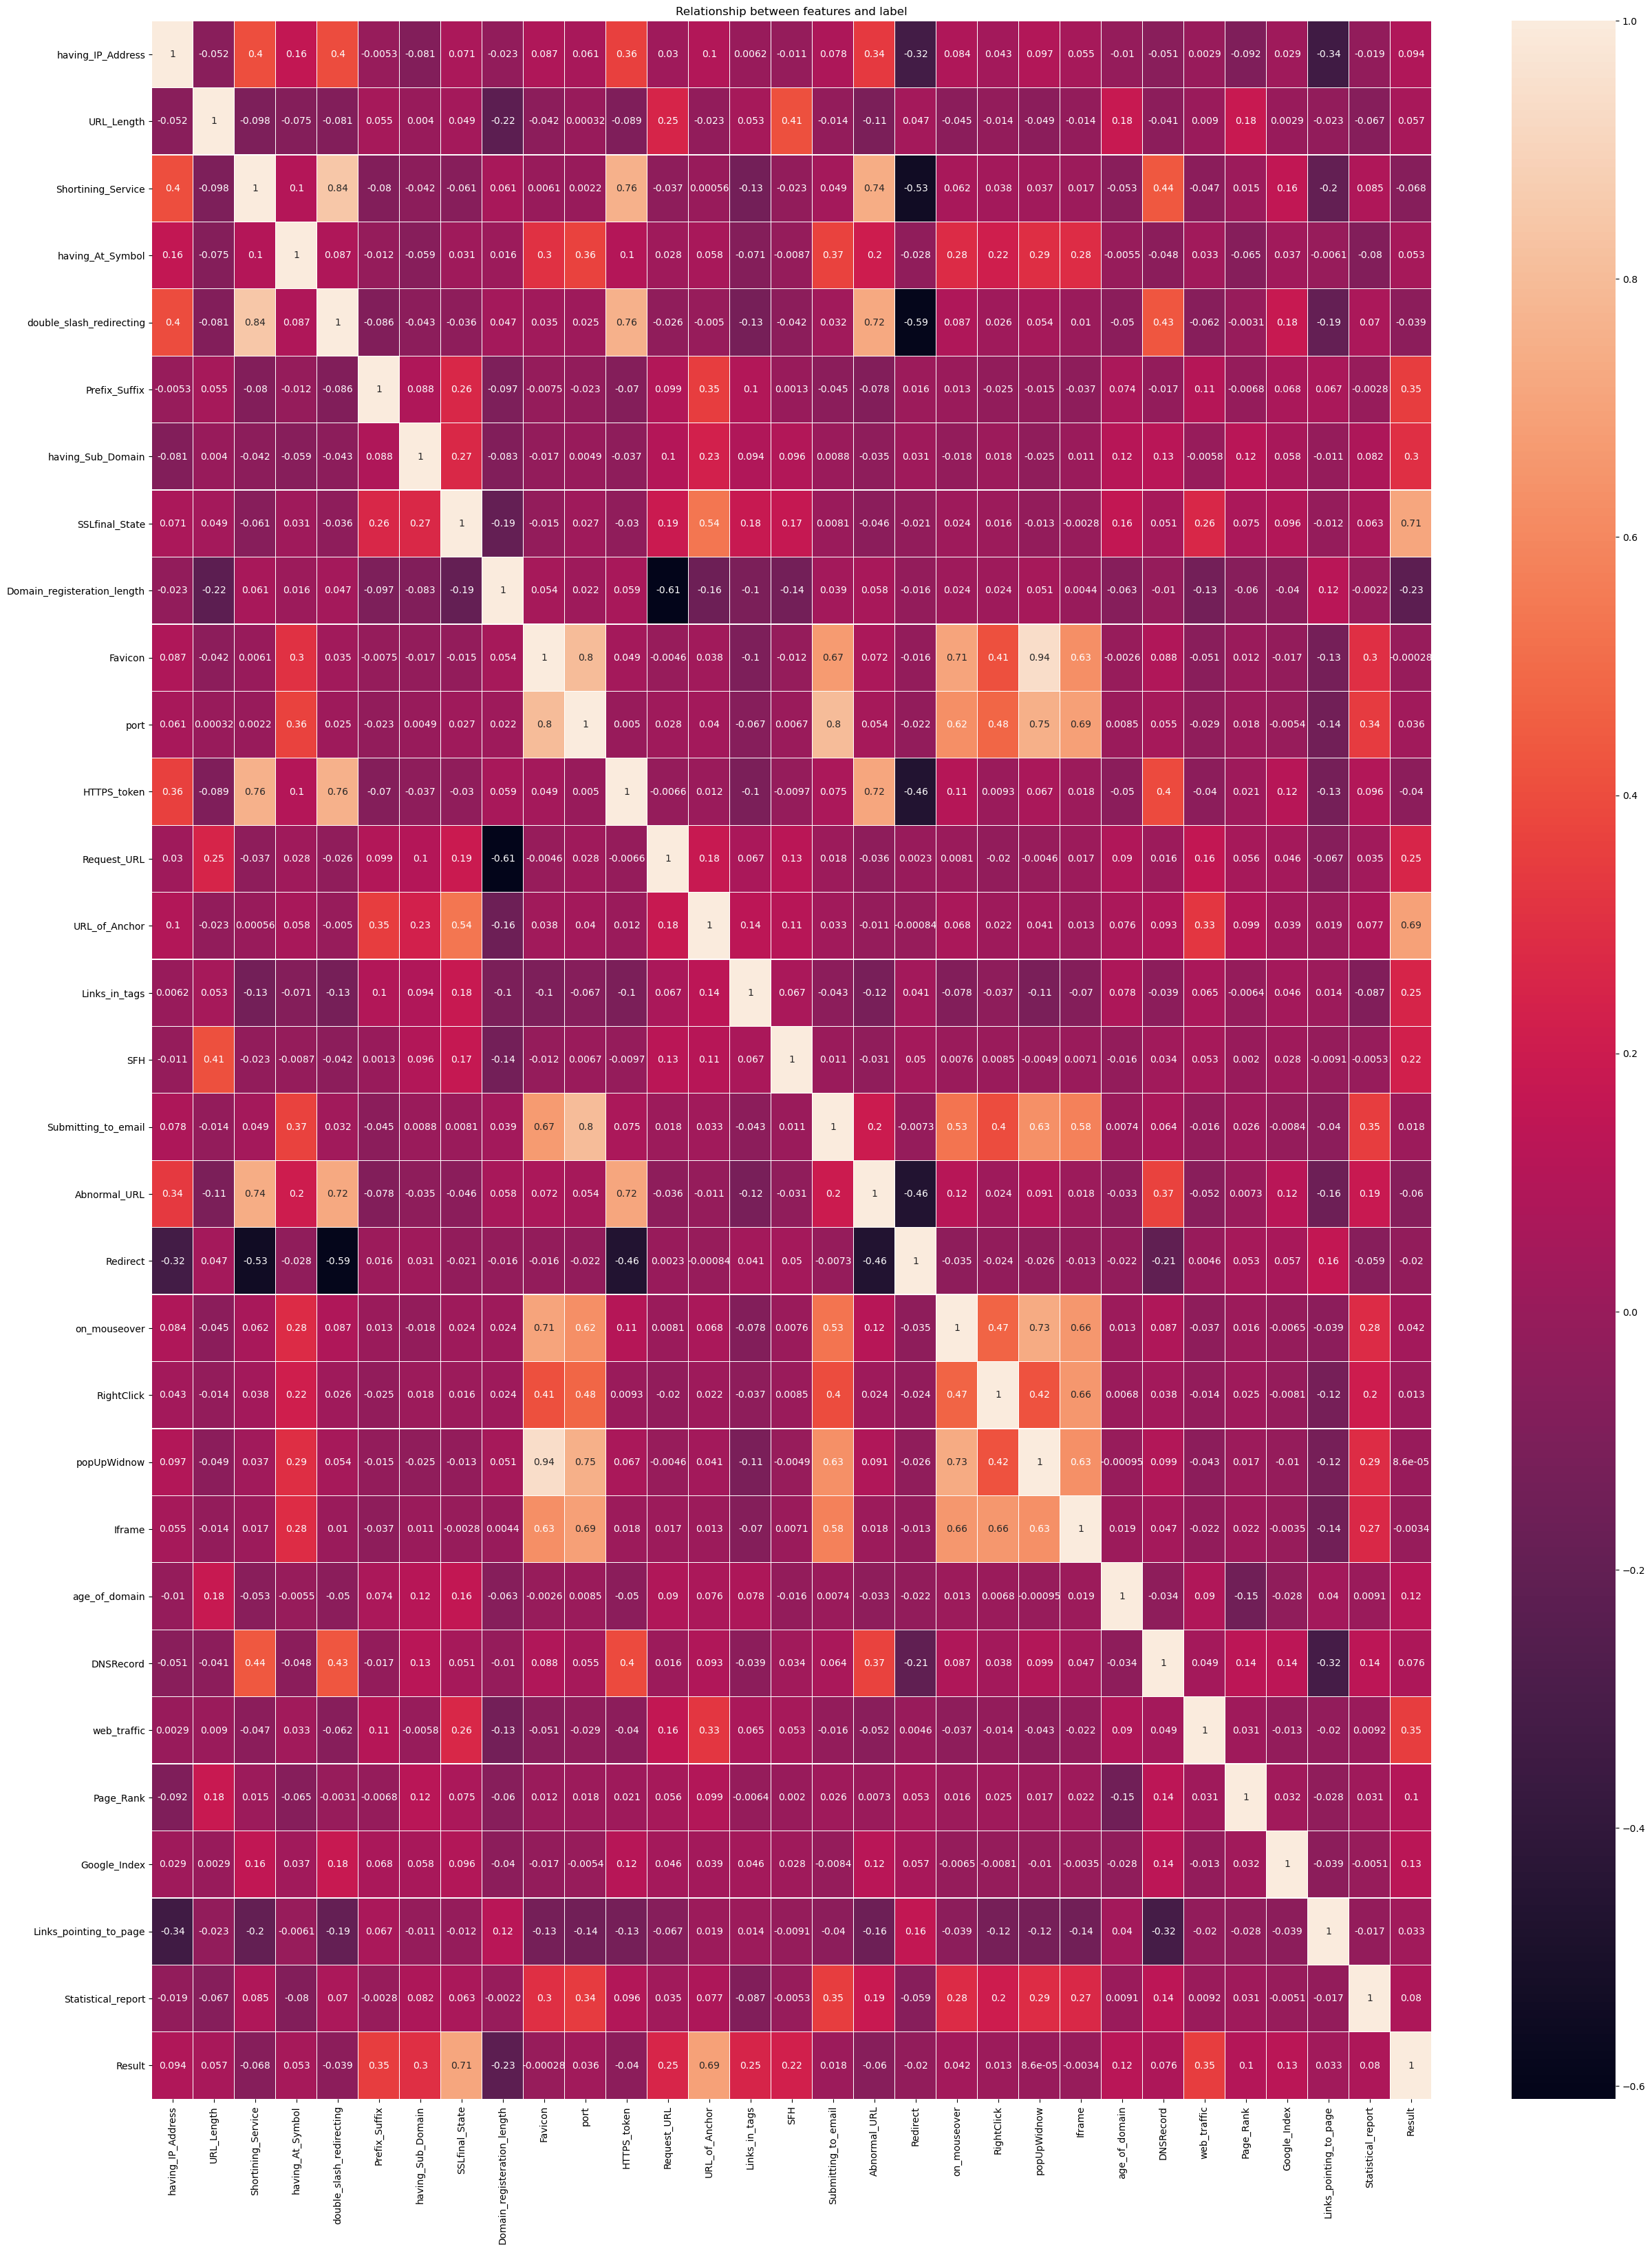

In [15]:
plt.figure(figsize=(30,40),dpi=100)
sb.heatmap(train.corr(),annot=True,linewidths=0.2)
plt.title("Relationship between features and label")
plt.savefig("D:/project/phishing/corr_n.png")

In [16]:
for column in train.columns:
    print(column+":",train[column].unique())

having_IP_Address: [-1  1]
URL_Length: [ 1  0 -1]
Shortining_Service: [ 1 -1]
having_At_Symbol: [ 1 -1]
double_slash_redirecting: [-1  1]
Prefix_Suffix: [-1  1]
having_Sub_Domain: [-1  0  1]
SSLfinal_State: [-1  1  0]
Domain_registeration_length: [-1  1]
Favicon: [ 1 -1]
port: [ 1 -1]
HTTPS_token: [-1  1]
Request_URL: [ 1 -1]
URL_of_Anchor: [-1  0  1]
Links_in_tags: [ 1 -1  0]
SFH: [-1  1  0]
Submitting_to_email: [-1  1]
Abnormal_URL: [-1  1]
Redirect: [0 1]
on_mouseover: [ 1 -1]
RightClick: [ 1 -1]
popUpWidnow: [ 1 -1]
Iframe: [ 1 -1]
age_of_domain: [-1  1]
DNSRecord: [-1  1]
web_traffic: [-1  0  1]
Page_Rank: [-1  1]
Google_Index: [ 1 -1]
Links_pointing_to_page: [ 1  0 -1]
Statistical_report: [-1  1]
Result: [-1  1]


In [17]:
for column in train.columns:
    print("value count of "+column+":" '\n',train[column].value_counts(normalize=True))
    print(20*"=+=")

value count of having_IP_Address:
  1    0.656897
-1    0.343103
Name: having_IP_Address, dtype: float64
=+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+=
value count of URL_Length:
 -1    0.810493
 1    0.177295
 0    0.012212
Name: URL_Length, dtype: float64
=+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+=
value count of Shortining_Service:
  1    0.86938
-1    0.13062
Name: Shortining_Service, dtype: float64
=+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+=
value count of having_At_Symbol:
  1    0.850294
-1    0.149706
Name: having_At_Symbol, dtype: float64
=+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+=
value count of double_slash_redirecting:
  1    0.870737
-1    0.129263
Name: double_slash_redirecting, dtype: float64
=+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+=
value count of Prefix_Suffix:
 -1    0.867481
 1    0.132519
Name: Prefix_Suffix, dtype: float64
=+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+=

In [18]:
train.groupby("Result").count().transpose()

Result,-1,1
having_IP_Address,4898,6157
URL_Length,4898,6157
Shortining_Service,4898,6157
having_At_Symbol,4898,6157
double_slash_redirecting,4898,6157
Prefix_Suffix,4898,6157
having_Sub_Domain,4898,6157
SSLfinal_State,4898,6157
Domain_registeration_length,4898,6157
Favicon,4898,6157


In [19]:
train.Result.value_counts(normalize=True)

 1    0.556943
-1    0.443057
Name: Result, dtype: float64

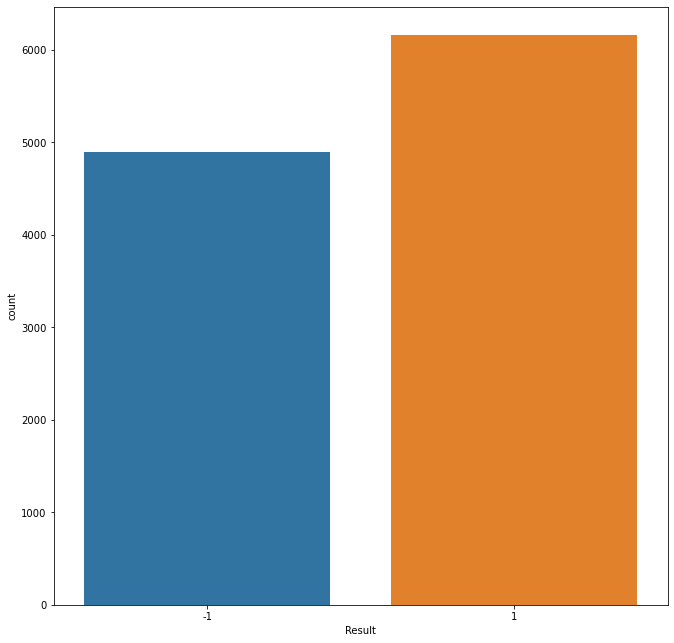

In [20]:
plt.figure(figsize=(11,11))
sb.countplot(train.Result);

In [21]:
##sb.pairplot(train)

<AxesSubplot:xlabel='Google_Index', ylabel='count'>

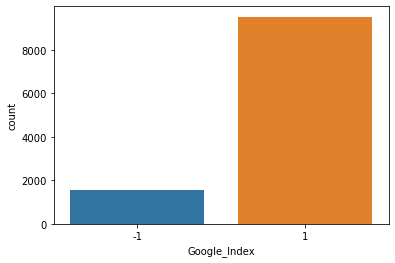

In [22]:
sb.countplot(train.Google_Index)

<AxesSubplot:xlabel='Request_URL', ylabel='count'>

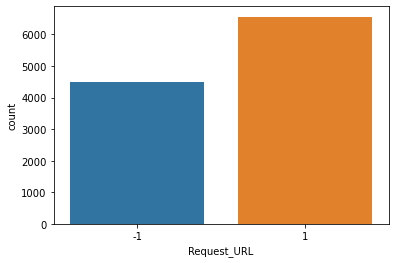

In [23]:
sb.countplot(train.Request_URL)

train test split

In [21]:
X=train.drop("Result",axis=1).values
y=train.Result
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,)

train model


In [22]:
##models
dt_gini=DecisionTreeClassifier(criterion="entropy",max_depth=5)
dt_entropy=DecisionTreeClassifier(criterion="gini",max_depth=5)
knn=KNeighborsClassifier(n_neighbors=5)

rf=RandomForestClassifier()

lr=LogisticRegression(random_state=42)

mlp=MLPClassifier(hidden_layer_sizes=(40,),max_iter=500)

poly_svm=SVC(kernel='poly')
linear_svm=SVC(kernel='linear')
sigmoid_svm=SVC(kernel='sigmoid')
rbf_svm=SVC(kernel='rbf')

model_list=[dt_gini,dt_entropy,knn,rf,lr,mlp,poly_svm,linear_svm,sigmoid_svm,rbf_svm]

train score:  0.921302578018996 and test score is:  0.9280868385345997

               precision    recall  f1-score   support

          -1       0.97      0.86      0.91       956
           1       0.90      0.98      0.94      1255

    accuracy                           0.93      2211
   macro avg       0.94      0.92      0.93      2211
weighted avg       0.93      0.93      0.93      2211
 



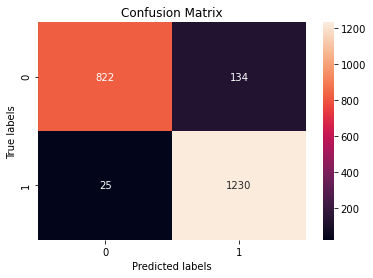


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.921302578018996 and test score is:  0.9280868385345997

               precision    recall  f1-score   support

          -1       0.97      0.86      0.91       956
           1       0.90      0.98      0.94      1255

    accuracy                           0.93      2211
   macro avg       0.94      0.92      0.93      2211
weighted avg       0.93      0.93      0.93      2211
 



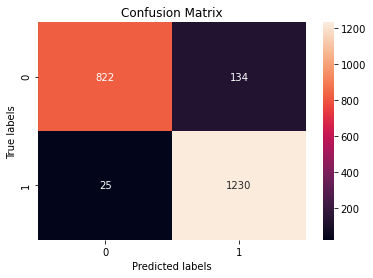


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.967209407507915 and test score is:  0.9647218453188603

               precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211
 



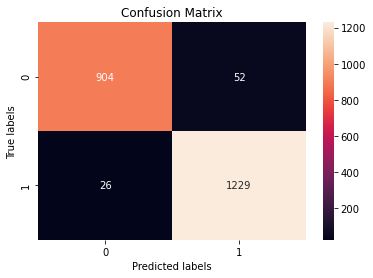


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.9892582541836273 and test score is:  0.9914066033469019

               precision    recall  f1-score   support

          -1       0.99      0.99      0.99       956
           1       0.99      1.00      0.99      1255

    accuracy                           0.99      2211
   macro avg       0.99      0.99      0.99      2211
weighted avg       0.99      0.99      0.99      2211
 



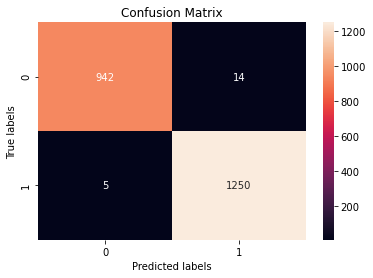


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.9289914066033469 and test score is:  0.9258254183627318

               precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.94      1255

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.92      2211
weighted avg       0.93      0.93      0.93      2211
 



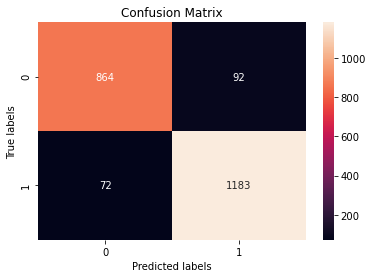


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.9821347806422434 and test score is:  0.9778380823156942

               precision    recall  f1-score   support

          -1       0.98      0.97      0.97       956
           1       0.98      0.98      0.98      1255

    accuracy                           0.98      2211
   macro avg       0.98      0.98      0.98      2211
weighted avg       0.98      0.98      0.98      2211
 



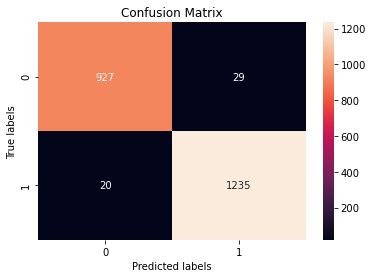


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.9601990049751243 and test score is:  0.9592944369063772

               precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.96      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211
 



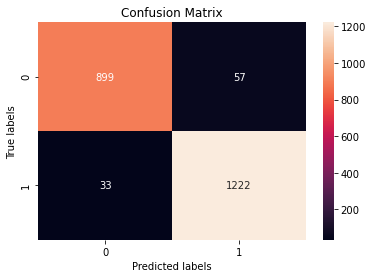


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.9280868385345997 and test score is:  0.9276345545002261

               precision    recall  f1-score   support

          -1       0.93      0.90      0.91       956
           1       0.92      0.95      0.94      1255

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.93      2211
weighted avg       0.93      0.93      0.93      2211
 



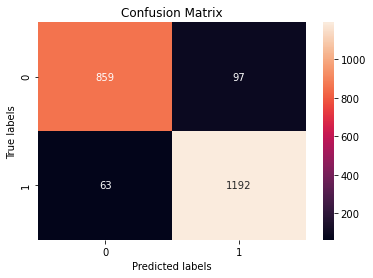


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.8325418362731796 and test score is:  0.8439620081411127

               precision    recall  f1-score   support

          -1       0.83      0.81      0.82       956
           1       0.86      0.87      0.86      1255

    accuracy                           0.84      2211
   macro avg       0.84      0.84      0.84      2211
weighted avg       0.84      0.84      0.84      2211
 



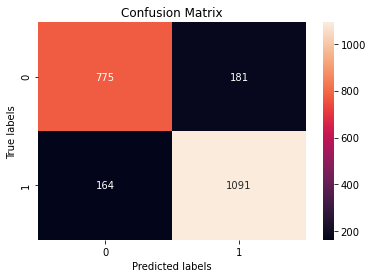


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 

train score:  0.9545454545454546 and test score is:  0.9534147444595206

               precision    recall  f1-score   support

          -1       0.96      0.93      0.95       956
           1       0.95      0.97      0.96      1255

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211
 



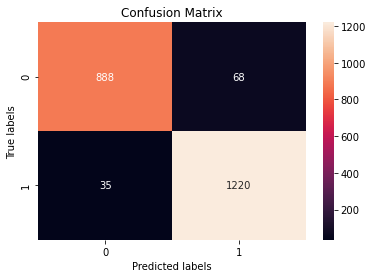


*_* *_* *_* *_* *_* *_* *_* *_* *_* *_* 



In [23]:
train_list=list()
test_list=list()
for model in model_list:
    model.fit(X,y)
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print("train score: ",train_score,"and test score is: ",test_score)
    test_list.append(test_score)
    train_list.append(train_score)
    predict_test=model.predict(x_test)
    print('\n',classification_report(y_test,predict_test),'\n')
    cm=confusion_matrix(y_test,predict_test)
    ax= plt.subplot()
    sb.heatmap(cm, annot=True, fmt='g', ax=ax);
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix');
    plt.show()
    print('\n'+10*"*_* "+'\n')

## pso

In [ ]:
class PSO(object):
    def __init__(self,particle_num,particle_dim,iter_num,c1,c2,w,max_value,min_value):
        
        self.particle_num = particle_num
        self.particle_dim = particle_dim
        self.iter_num = iter_num
        self.c1 = c1  
        self.c2 = c2  
        self.w = w    
        self.max_value = max_value
        self.min_value = min_value
        
        

    def swarm_origin(self):
        particle_loc = []
        particle_dir = []
        for i in range(self.particle_num):
            tmp1 = []
            tmp2 = []
            for j in range(self.particle_dim):
                a = random.random()
                b = random.random()
                tmp1.append(a * (self.max_value - self.min_value) + self.min_value)
                tmp2.append(b)
            particle_loc.append(tmp1)
            particle_dir.append(tmp2)
        
        return particle_loc,particle_dir

    def fitness(self,particle_loc):
        
        fitness_value = []
        for i in range(self.particle_num):
            rbf_svm = SVC(kernel = 'rbf', C = particle_loc[i][0], gamma = particle_loc[i][1])
            cv_scores = cross_val_score(rbf_svm,trainX,trainY,cv =3,scoring = 'accuracy')
            fitness_value.append(cv_scores.mean())
        
        current_fitness = 0.0
        current_parameter = []
        for i in range(self.particle_num):
            if current_fitness < fitness_value[i]:
                current_fitness = fitness_value[i]
                current_parameter = particle_loc[i]

        return fitness_value,current_fitness,current_parameter 
        

    def updata(self,particle_loc,particle_dir,gbest_parameter,pbest_parameters):
        
        for i in range(self.particle_num): 
            a1 = [x * self.w for x in particle_dir[i]]
            a2 = [y * self.c1 * random.random() for y in list(np.array(pbest_parameters[i]) - np.array(particle_loc[i]))]
            a3 = [z * self.c2 * random.random() for z in list(np.array(gbest_parameter) - np.array(particle_dir[i]))]
            particle_dir[i] = list(np.array(a1) + np.array(a2) + np.array(a3))
            particle_loc[i] = list(np.array(particle_loc[i]) + np.array(particle_dir[i]))
        
        parameter_list = []
        for i in range(self.particle_dim):
            tmp1 = []
            for j in range(self.particle_num):
                tmp1.append(particle_loc[j][i])
            parameter_list.append(tmp1)
           
        value = []
        for i in range(self.particle_dim):
            tmp2 = []
            tmp2.append(max(parameter_list[i]))
            tmp2.append(min(parameter_list[i]))
            value.append(tmp2)
        
        for i in range(self.particle_num):
            for j in range(self.particle_dim):
                particle_loc[i][j] = (particle_loc[i][j] - value[j][1])/(value[j][0] - value[j][1]) * (self.max_value - self.min_value) + self.min_value
                
        return particle_loc,particle_dir

    def plot(self,results):
        
        X = []
        Y = []
        for i in range(self.iter_num):
            X.append(i + 1)
            Y.append(results[i])
        plt.plot(X,Y)
        plt.xlabel('Number of iteration',size = 15)
        plt.ylabel('Value of CV',size = 15)
        plt.title('PSO_RBF_SVM parameter optimization')
        plt.show() 
        

    def main(self):
        
        results = []
        best_fitness = 0.0 
        
        particle_loc,particle_dir = self.swarm_origin()
        
        gbest_parameter = []
        for i in range(self.particle_dim):
            gbest_parameter.append(0.0)
        pbest_parameters = []
        for i in range(self.particle_num):
            tmp1 = []
            for j in range(self.particle_dim):
                tmp1.append(0.0)
            pbest_parameters.append(tmp1)
        fitness_value = []
        for i in range(self.particle_num):
            fitness_value.append(0.0)
    
        
        for i in range(self.iter_num):
            current_fitness_value,current_best_fitness,current_best_parameter = self.fitness(particle_loc)
            
            for j in range(self.particle_num):
                if current_fitness_value[j] > fitness_value[j]:
                    pbest_parameters[j] = particle_loc[j]
            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                gbest_parameter = current_best_parameter
            
            print('iteration is :',i+1,';Best parameters:',gbest_parameter,';Best fitness',best_fitness)
            results.append(best_fitness)
            fitness_value = current_fitness_value
            particle_loc,particle_dir = self.updata(particle_loc,particle_dir,gbest_parameter,pbest_parameters)
        results.sort()
        self.plot(results)
        print('Final parameters are :',gbest_parameter)
            

if __name__ == '__main__':
    print('----------------1.Load Data-------------------')
    trainX,trainY = x_train,y_train
    print('----------------2.Parameter Seting------------')
    particle_num = 100
    particle_dim = 2
    iter_num = 50
    c1 = 2
    c2 = 2
    w = 0.8
    max_value = 15
    min_value = 0.001
    print('----------------3.PSO_RBF_SVM-----------------')
    pso = PSO(particle_num,particle_dim,iter_num,c1,c2,w,max_value,min_value)
    pso.main()

In [24]:
train_list.append(pos_train_list)
test_list.append(pos_test_list)
model_name = ['dt_gini','dt_entropy','knn','rf','lr','mlp','poly_svm','linear_svm','sigmoid_svm','rbf_svm',"pos_rbf_svm"]
score_df = pd.DataFrame(data=[train_list,test_list],index=["train_scores","test_scores"],columns=model_name).transpose()

<AxesSubplot:>

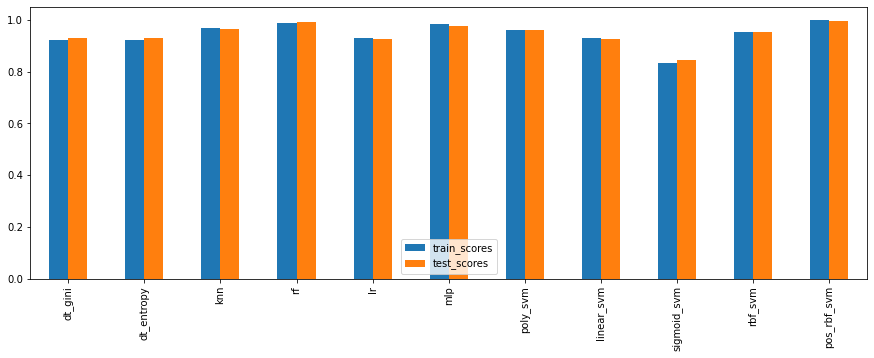

In [25]:
score_df.plot.bar(figsize=(15,5))

In [26]:
score_df.T

,dt_gini,dt_entropy,knn,rf,lr,mlp,poly_svm,linear_svm,sigmoid_svm,rbf_svm,pos_rbf_svm
train_scores,0.921303,0.921303,0.967209,0.989258,0.928991,0.982135,0.960199,0.928087,0.832542,0.954545,0.999869
test_scores,0.928087,0.928087,0.964722,0.991407,0.925825,0.977838,0.959294,0.927635,0.843962,0.953415,0.995499
